# Explore SWIFT UVOT Event Timing Data

The goal of this notebook is to explore the event level data from Swift UVOT.

In [1]:
from astropy.io import fits
from astropy.table import Table
from scipy.sparse import coo_matrix

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

### Read in the event-level data

See the README instructions in the data directory for how to get this data and extract it.

We read the data in from a FITS file, convert it to an astropy Table, and then to a Pandas DataFrame.

In [2]:
hdus = fits.open('../data/sw00031677006uuuw1po_uf.evt')
hdu = hdus[1]
raw_data = hdu.data
raw_table = Table(raw_data)
df = raw_table.to_pandas()

In [3]:
df.tail(3)

,TIME,RAWX,RAWY,DETX,DETY,X,Y,EXPREF,QUALITY
18177326,5.458990e+08,1299,2024,1354,2099,2191,998,1,256
18177327,5.458990e+08,234,2037,327,2104,3084,1505,1,256
18177328,5.458990e+08,575,2035,651,2111,2806,1338,1,256


### Convert the sparse matrix to a dense matrix

We will count each photon into bins of time.  First, let's just compute the sum of all counts.  There's one photon per event.

In [4]:
df['flux'] = 1

In [5]:
sparse_input = (df.flux, (df.RAWX, df.RAWY))
sparse_matrix = coo_matrix(sparse_input, shape=(2048,2048))

In [6]:
dense_matrix = sparse_matrix.todense()

In [7]:
dense_matrix.max()

770

In [8]:
assert dense_matrix.sum() == len(df)

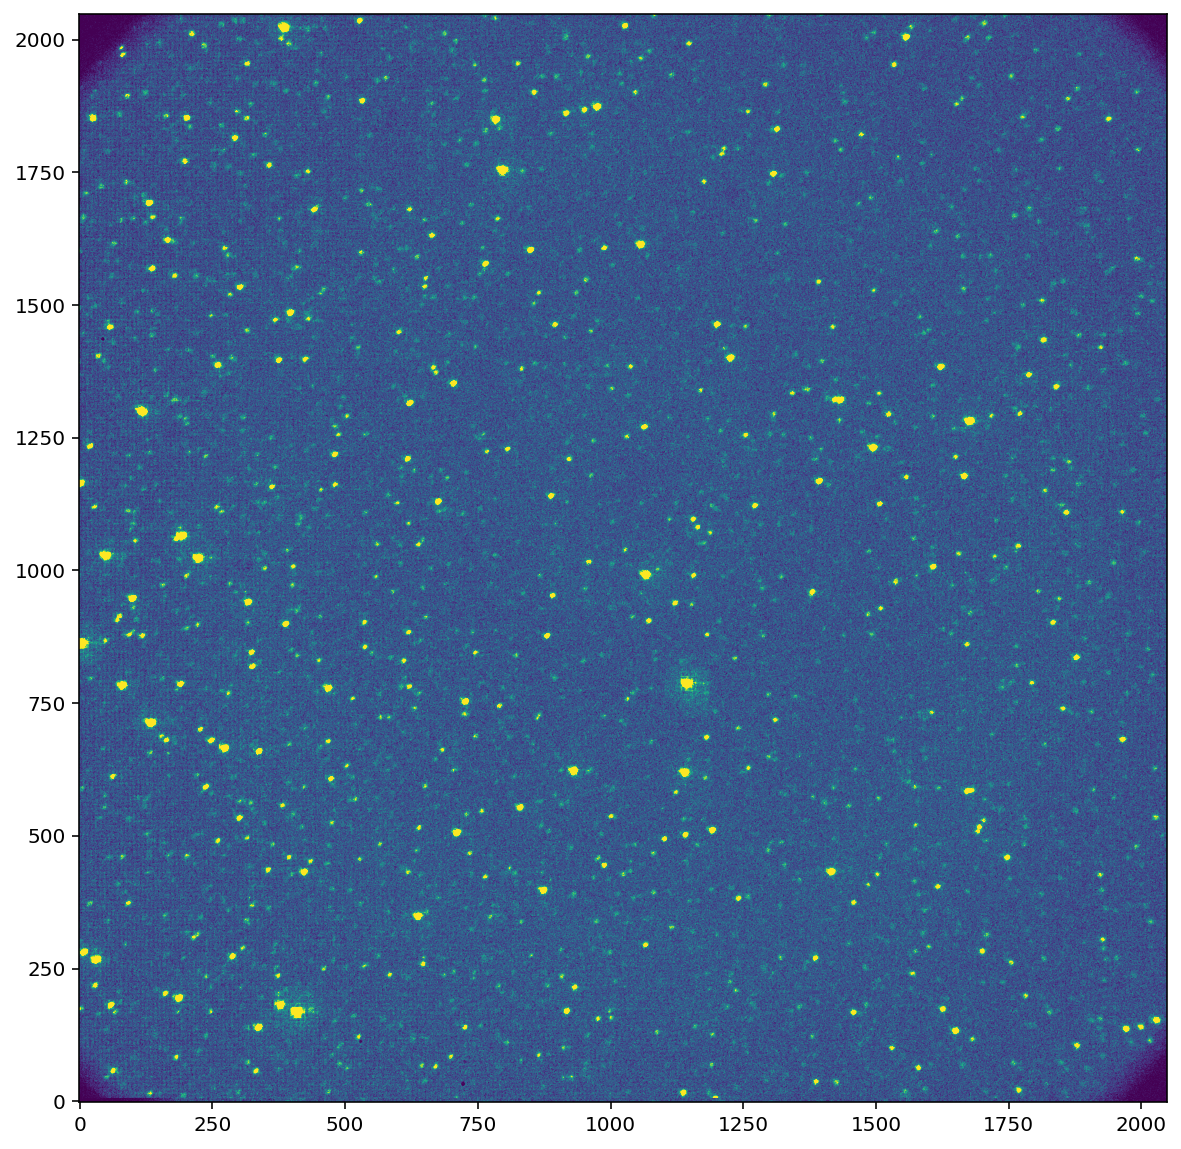

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(dense_matrix, vmin=0, vmax=15, origin='lower');

Yay! We made an image from the Swift Event-level data!